In [1]:
%load_ext autoreload
%autoreload 2
import sys; sys.path.append('../../'); from config import *
configure_pylab()

Available files:
	r2288_180515b_tet2_cell2_GC.mat
	r2289_250515b_tet2_cell2_GC.mat
	r2298_290615c_tet6_cell6_GC.mat
	r2375_070416a_tet1_cell1_GC.mat
	r2375_140416b_tet1_cell1_GC.mat
	r2375_210416a_tet3_cell3_GC.mat
	r2383_160516b_tet4_cell4_GC.mat
	r2405_011216a_cell2955.mat
	r2405_051216b_cell1816.mat
	r2405_121216b_cell1880.mat
	r2405_121216b_cell1912.mat
	r2405_191216c_cell1640.mat
	r2405_191216c_cell1662.mat
	r2405_191216c_cell1962.mat
	r2405_191216c_cell1990.mat
Fitted models in fitdir = /home/mer49/Desktop/lgcpspatial/python/notebooks/hyperparameter_fits/


Text(0.5, 0.98, 'Example kernel functions')

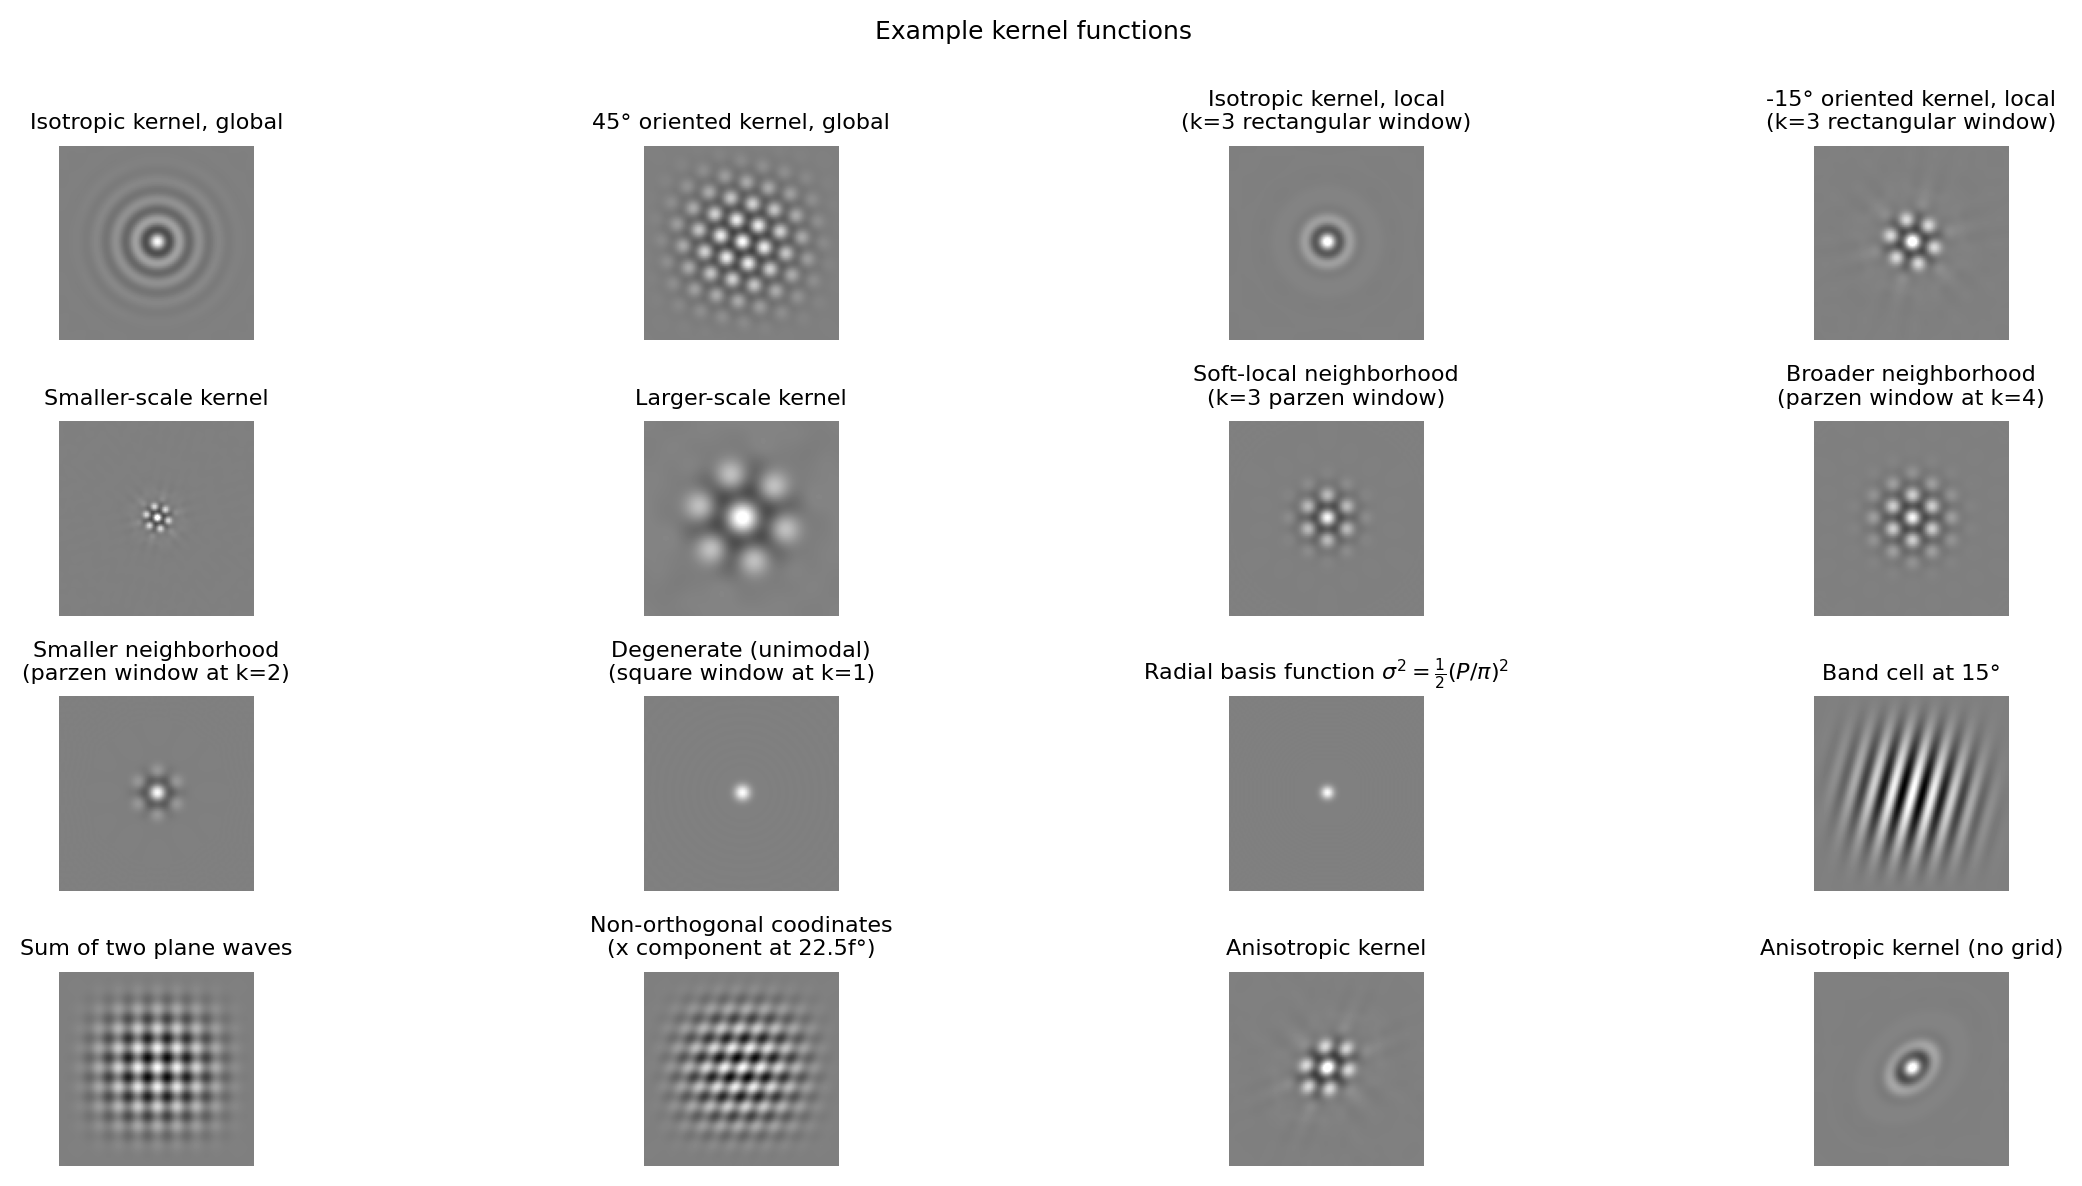

In [2]:
W = 100 # grid idth
H = 100 # grid height
P = 10  # cell period
L = (H,W)

# Plot helper
figure(0,(12,6),200)
nr = nc = 4; ip = 1
kernels = []
def im(k,t):
    global nr,nc,ip,kernels
    subplot(nr,nc,ip); ip+=1
    imshow(fftshift(k),vmin=-1,vmax=1,cmap='gray')
    axis('off'); title(t)
    kernels.append((k,t))

# Arguments to `grid_kernel()` to make various types of kernels
im(grid_kernel(P  ,L,'radial',window=None)                     ,'Isotropic kernel, global')
im(grid_kernel(P  ,L,'grid'  ,angle=pi/4,window=None)          ,'45° oriented kernel, global')
im(grid_kernel(P  ,L,'radial',window='square',k=3)             ,'Isotropic kernel, local\n(k=3 rectangular window)')
im(grid_kernel(P  ,L,'grid'  ,angle=-pi/12,window='square',k=3),'-15° oriented kernel, local\n(k=3 rectangular window)')
im(grid_kernel(P/2,L,'grid'  ,angle=-pi/12,window='square',k=3),'Smaller-scale kernel')
im(grid_kernel(P*2,L,'grid'  ,angle=-pi/12,window='square',k=3),'Larger-scale kernel')
im(grid_kernel(P  ,L,'grid'  ,window='parzen',k=3)             ,'Soft-local neighborhood\n(k=3 parzen window)')
im(grid_kernel(P  ,L,'grid'  ,window='parzen',k=4)             ,'Broader neighborhood\n(parzen window at k=4)')
im(grid_kernel(P  ,L,'grid'  ,window='parzen',k=2)             ,'Smaller neighborhood\n(parzen window at k=2)')
im(grid_kernel(P  ,L,'radial',window='square',k=1,doblur=True) ,'Degenerate (unimodal)\n(square window at k=1)')
im(grid_kernel(P  ,L,'rbf'   ,doclip=False)                    ,'Radial basis function $\\sigma^2=\\frac{1}{2}(P/\\pi)^2$')
im(grid_kernel(P  ,L,'band'  ,doclip=False,angle=15*pi/180)    ,'Band cell at 15°')
im(grid_kernel(P  ,L,'square',doclip=False)                    ,'Sum of two plane waves')
rt = exp(1j*22.5*pi/180)
im(grid_kernel(P  ,L,'square',doclip=False,angle=0,ex=(rt.real,rt.imag)),'Non-orthogonal coodinates\n(x component at 22.5f°)')
anisotropy=1.2
im(grid_kernel(P  ,L,'grid'  ,angle=pi/4,ex=(1/anisotropy,0),ey=(0,anisotropy)),'Anisotropic kernel')
im(grid_kernel(P  ,L,'radial',angle=pi/4,ex=(1/anisotropy,0),ey=(0,anisotropy)),'Anisotropic kernel (no grid)')
tight_layout()
subplots_adjust(top=0.875,wspace=0.0)
suptitle('Example kernel functions')


# Paper subfigure 

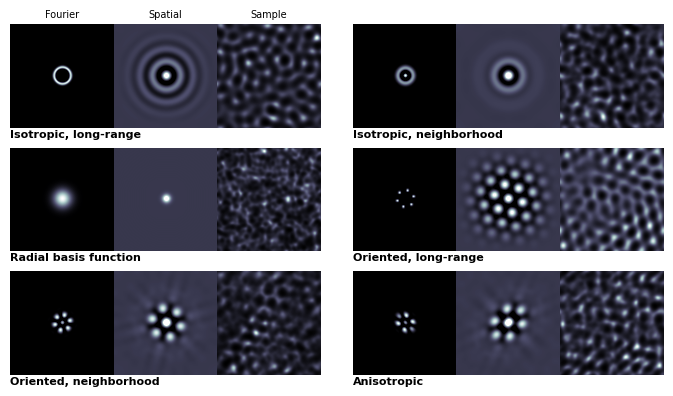

In [3]:
W = 100 # grid idth
H = 100 # grid height
P = 12  # cell period
L = (H,W)

# Plot helper
figure(0,(7,4),100,facecolor='w')
nr = 3
nc = 2
ip = 1
def im(k,t):
    global nr,nc,ip,kernels
    subplot(nr,nc,ip); ip+=1
    C = RI(fft2(k,norm='ortho'))**0.4
    ξ = randn(*k.shape)
    z = RI(ifft2(C*ξ,norm='ortho'))
    
    imshow(fftshift(fft2(k).real),cmap='bone',extent=(0,1,0,1))
    imshow(fftshift(k),vmin=-.25,vmax=0.75,cmap='bone',extent=(1,2,0,1))
    imshow(exp(4*z),cmap='bone',extent=(2,3,0,1))
    ax = gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.xaxis.set_tick_params(length=0, width=0, which='both')
    xlim(0,3); ylim(0,1); xticks([]), yticks([]) 
    xlabel(t,labelpad=1,loc='left',fontweight='bold')

# Arguments to `grid_kernel()` to make various types of kernels
im(grid_kernel(P  ,L,'radial',window=None)                         ,'Isotropic, long-range')

ax = gca()
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
xticks([.5,1.5,2.5],['Fourier','Spatial','Sample'])
    
im(grid_kernel(P  ,L,'radial',window='square',k=3)                 ,'Isotropic, neighborhood')
im(grid_kernel(P  ,L,'rbf'   ,doclip=False)                        ,'Radial basis function')# $\\sigma=\\frac{P}{\\pi\\sqrt{2}}$')
im(grid_kernel(P  ,L,'grid'  ,angle=pi/4,window=None)          ,'Oriented, long-range')
im(grid_kernel(P  ,L,'grid'  ,angle=-pi/12,window='square',k=3),'Oriented, neighborhood')
anisotropy=1.2
im(grid_kernel(P  ,L,'grid'  ,angle=pi/4,ex=(1/anisotropy,0),ey=(0,anisotropy)),'Anisotropic')
tight_layout()

savefig('fig3a_v2_kernel_examples.pdf')